In [35]:
%sql sqlite:///chicago.db

In [37]:
!pip install ipython-sql
!pip install seaborn
import seaborn as sns
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [39]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install pandas 

In [41]:
%sql sqlite:///socioeconomic.db

In [43]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [45]:
!pip install ipython-sql prettytable

import prettytable

prettytable.DEFAULT = 'DEFAULT'

In [47]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [49]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [51]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [53]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [55]:
%sql SELECT community_area_name, hardship_index FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


community_area_name,hardship_index
Riverdale,98.0


In [57]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data );

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [59]:
%sql SELECT community_area_name, per_capita_income_ FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


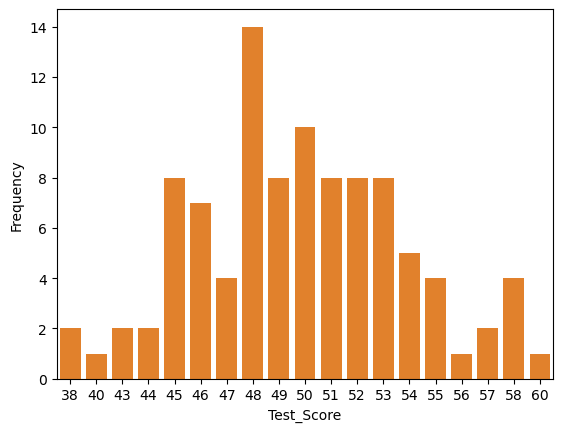

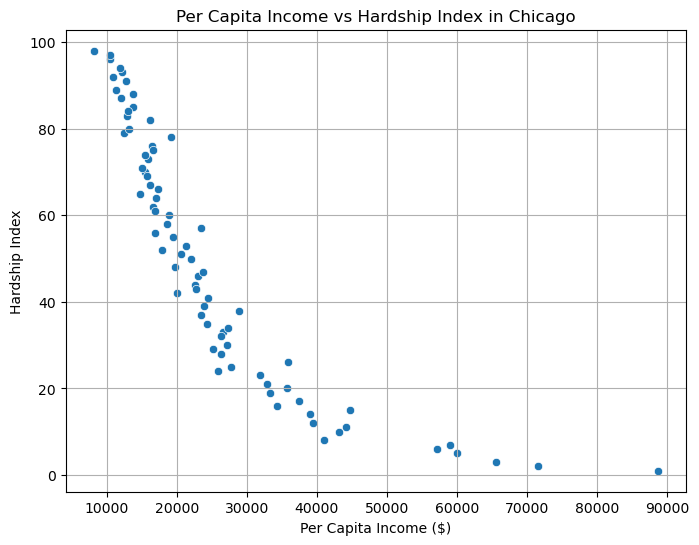

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pandas.read_sql("SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data", con)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="per_capita_income_", y="hardship_index")
plt.title("Per Capita Income vs Hardship Index in Chicago")
plt.xlabel("Per Capita Income ($)")
plt.ylabel("Hardship Index")
plt.grid(True)
plt.show()

In [67]:
!pip install matplotlib seaborn
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

   sqlite:///DatabaseName.db
   sqlite:///SQLiteMagic.db
   sqlite:///chicago.db
 * sqlite:///socioeconomic.db
Done.
